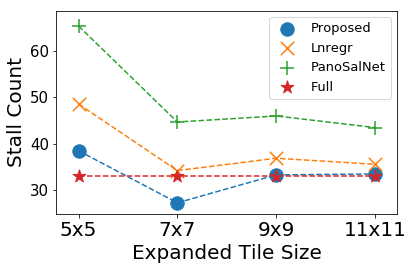

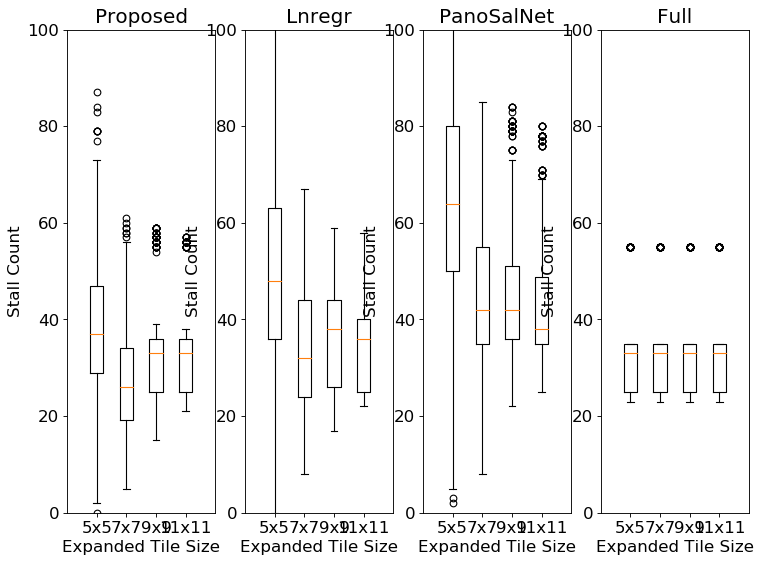

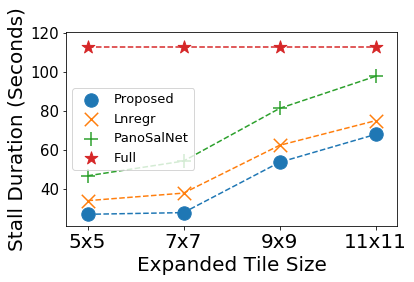

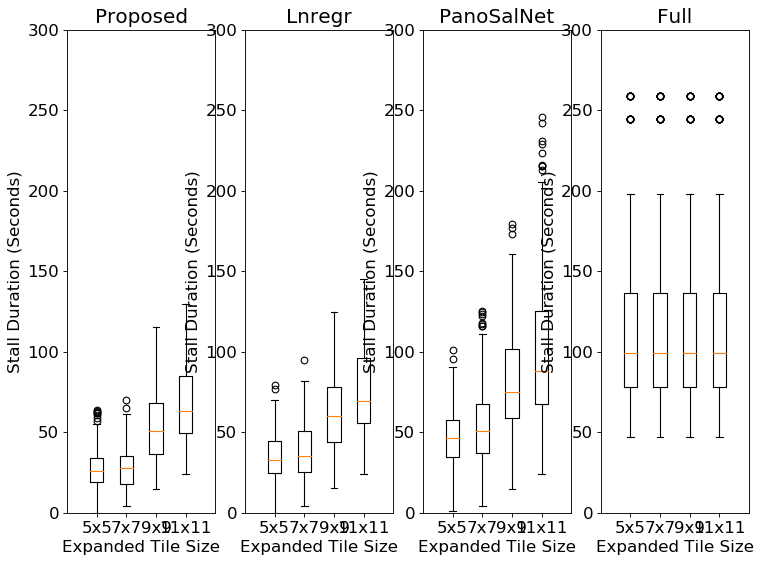

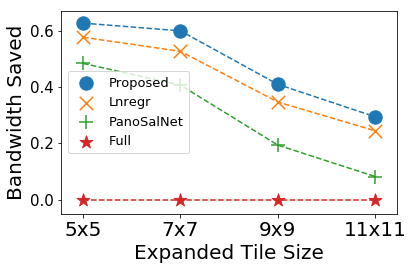

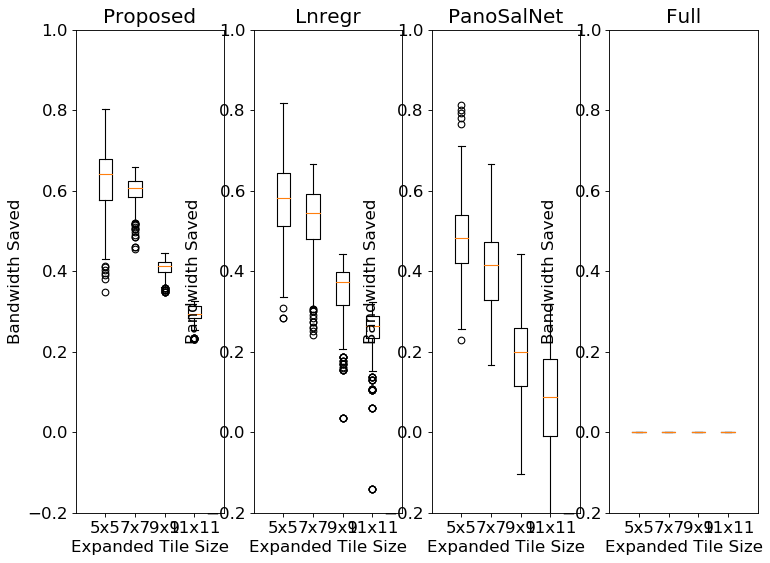

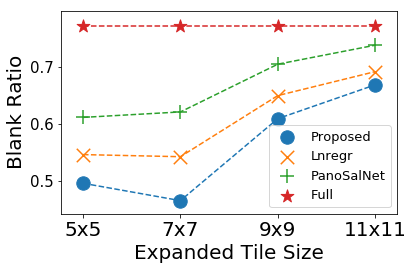

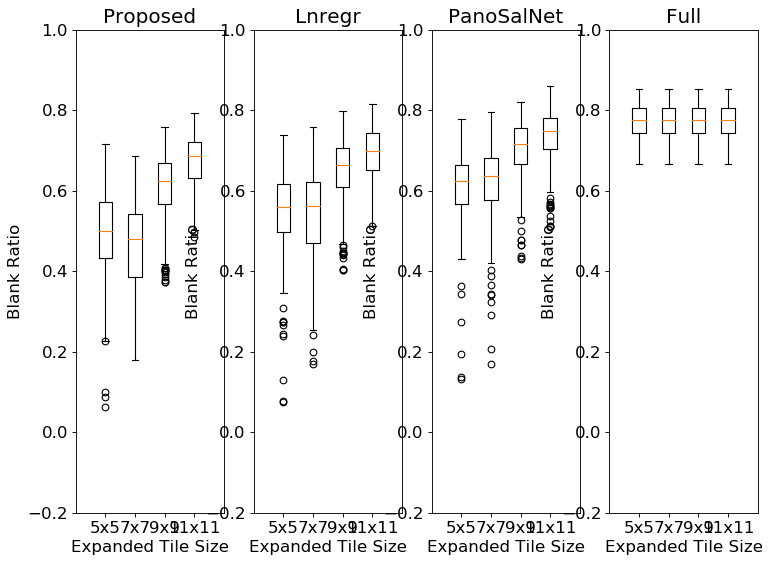

In [1]:
import test_simulator_lib
reload(test_simulator_lib)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
look_ahead = 16
scale_mean = 8.5
scale_std = 4.5
bwscale = '{}_{}'.format(scale_mean, scale_std)
RAD_list = [2, 3, 4, 5]
radlist_str = '_'.join(map(str, RAD_list))
lstm_log, lnregr_log, sal_log, full_log = test_simulator_lib.load_log('test1', radlist_str, look_ahead, bwscale)

col_title=['a', 'b', 'c', 'd', 'e']
xlabel_list=['Stall count', 'Stall duration', 'Start time', 'Bandwidth saved', 'Blank ratio']
xticks=['5x5', '7x7', '9x9', '11x11']
x = np.arange(len(xticks))
xlabel='Expanded Tile Size'
modelname_list = ['Proposed', 'Lnregr', 'PanoSalNet', 'Full']

        
col = 0#showing just the stalling count
title = 'fig_Stall_Count_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
test_simulator_lib.plot_log(plt, x, xticks, y_list, modelname_list, title=title, xlabel=xlabel, ylabel='Stall Count', axis=[0, 5, 0, 100])   

col = 1#showing just the stalling duration
title = 'fig_Seconds_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
test_simulator_lib.plot_log(plt, x, xticks, y_list, modelname_list, title=title, xlabel=xlabel, ylabel='Stall Duration (Seconds)', axis=[0, 5, 0, 300])  

col = 3#showing just the bandwidth saved
title = 'fig_Bandwidth_Saved_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
y_list2 = 1 - y_list/y_list[-1].max(axis=0)
test_simulator_lib.plot_log(plt, x, xticks, y_list2, modelname_list,  title=title, xlabel=xlabel, ylabel='Bandwidth Saved', axis=[0, 5, -0.2, 1])  

col = 4#showing just the blank ratio
title = 'fig_Blank_Ratio_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
y_list2 = 1. - y_list
test_simulator_lib.plot_log(plt, x, xticks, y_list2, modelname_list,  title=title, xlabel=xlabel, ylabel='Blank Ratio', axis=[0, 5, -0.2, 1])  